Saving Iris.csv to Iris.csv
Dataset Shape: (150, 5)
Class Distribution:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


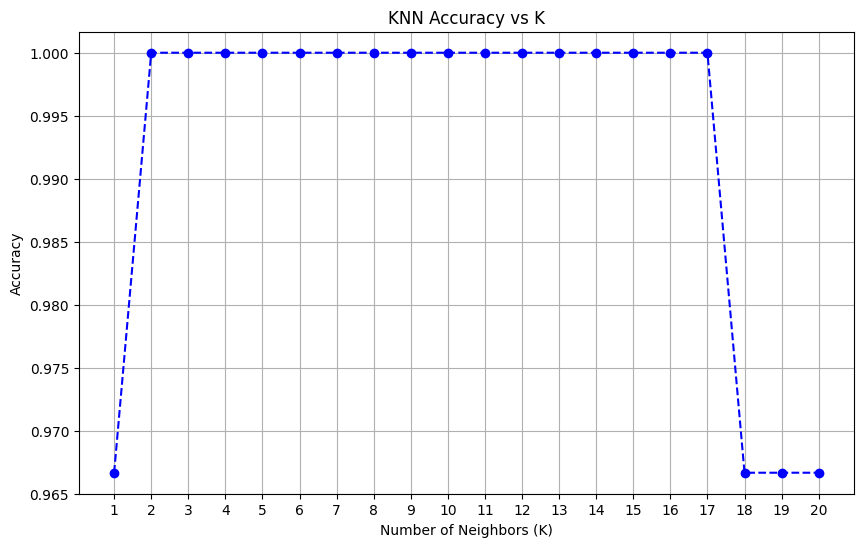

✅ Best K = 2 with Accuracy = 1.00


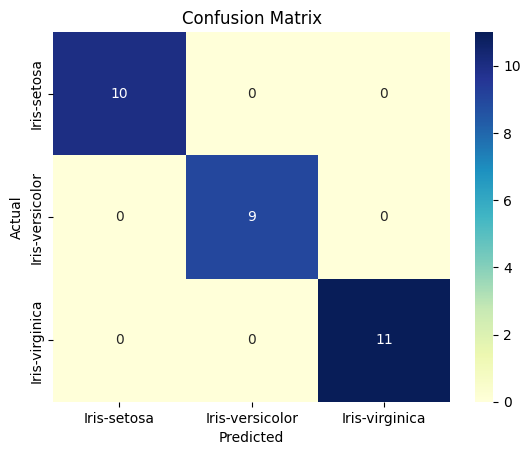

📄 Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [2]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 📁 Step 2: Upload CSV manually in Colab
from google.colab import files
uploaded = files.upload()

# Load the uploaded file
import io
df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

# 👀 Step 3: Explore and Clean
df.drop(columns=['Id'], inplace=True)  # Drop Id column if present
print("Dataset Shape:", df.shape)
print("Class Distribution:\n", df['Species'].value_counts())

# 🧹 Step 4: Feature Scaling & Train-Test Split
X = df.drop('Species', axis=1)
y = df['Species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🤖 Step 5: KNN Training & Accuracy for Different K
k_range = range(1, 21)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# 📊 Step 6: Plot Accuracy vs K
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o', linestyle='--', color='b')
plt.title('KNN Accuracy vs K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# 🔍 Step 7: Evaluate Best Model
best_k = k_range[np.argmax(accuracies)]
print(f"✅ Best K = {best_k} with Accuracy = {max(accuracies):.2f}")

# Final model with best K
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)

# 🧩 Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=knn_final.classes_,
            yticklabels=knn_final.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 📝 Step 9: Classification Report
print("📄 Classification Report:\n")
print(classification_report(y_test, y_pred_final))
